## Visualisation of static vs. dynamic parts of the image

In [2]:
from __init__ import *
import matplotlib.pyplot as plt
import cv2
import h5py
from strawml.data.make_dataset import decode_binary_image
import numpy as np
import time

hdf5_file = 'D:/HCAI/msc/strawml/data/raw/images/images.hdf5'
hdf5_file = 'C:/Users/denni/Documents/strawml/data/raw/images/images.hdf5'
hdf5_file = 'D:/HCAI/msc/strawml/data/processed/augmented/chute_detection.hdf5'

One select image

frame_537
Heatmap image dtype: uint8
Heatmap image shape: (964, 532)
Heatmap image min: 0
Heatmap image max: 33
Heatmap image mean: 0.411991467257355
Original image dtype: uint8
Original image shape: (964, 532, 3)


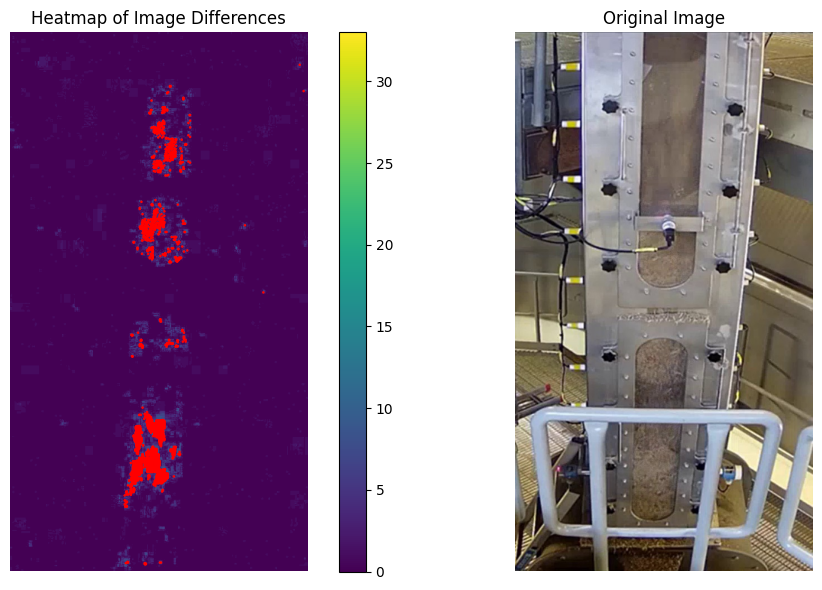

In [28]:
with h5py.File(hdf5_file, 'r') as hf:
    # Assuming 'running_averages' contains the running average of frame differences
    frame = np.random.choice(list(hf.keys()))
    image_bytes = hf[frame]['image_diff'][...]
    # decode the binary image
    image = decode_binary_image(image_bytes)
    # make image grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Load the original image from the temp_images folder
    print(frame)
    original_image = cv2.imread(f'D:/HCAI/msc/strawml/data/raw/temp_images/{frame}.jpg')
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    # calculate the absolute difference between the two images    # show the images side by side in the same window
    # plot cv2 image as heatmap

    # cv2.imshow('Original Image', original_image)
    # cv2.imshow('Decoded Image', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
# Check the data types and shapes
print("Heatmap image dtype:", image.dtype)
print("Heatmap image shape:", image.shape)
print("Heatmap image min:", image.min())
print("Heatmap image max:", image.max())
print("Heatmap image mean:", image.mean())
print("Original image dtype:", original_image.dtype)
print("Original image shape:", original_image.shape)


# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ensure the image is a valid NumPy array with numeric values
img = axes[0].imshow(image, cmap='viridis')  # Heatmap for the binary image
plt.colorbar(img)
# draw red circle around pixels with value > 0
for i in range(image.shape[0]):
   for j in range(image.shape[1]):
      if image[i, j] > 10:
         axes[0].add_patch(plt.Circle((j, i), 1, color='r', fill=False))
axes[0].set_xlim(0, image.shape[1])
axes[0].set_ylim(image.shape[0], 0)
axes[0].invert_yaxis()
axes[0].invert_xaxis()
axes[0].set_aspect('equal')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Heatmap of Image Differences')
axes[0].axis('off')

if isinstance(original_image, np.ndarray) and original_image.dtype.kind in 'ui' and original_image.ndim == 3:
    axes[1].imshow(original_image)  # Original image
else:
    print("Error: Original image data is not in the expected format.")
axes[1].set_title('Original Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [5]:
# show all the frames in the hdf5 file as a video stream
with h5py.File(hdf5_file, 'r') as hf:
    sorted_keys = sorted(hf.keys(), key=lambda x: int(x.split('_')[1]))
    for frame in sorted_keys:
        image_bytes = hf[frame]['image'][...]
        image = decode_binary_image(image_bytes)
        image = image.astype(np.float32)
        image = image/255.0
        # resize image to half size
        image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
        cv2.imshow('Frame', image)
        cv2.waitKey(0)
        # resize window
        # time.sleep(0.1)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cv2.destroyAllWindows()